# An Investigation Into The Properties Of Electrons In Quantum Wells

### F321911

Through this notebook I will be investigating the properties of electrons inside quantum wells. I will be considering multiple different configurations of quantum wells.

Firstly, considering just one dimension for position the time independent Schrodinger equation can be shown to be equal to:  

$$
 -\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x) [1]
$$


We can see that $\psi(x)$ and $E$ can be solved numerically. To do this we need to first consider $x$ to be discretised uniformly along a grid such that: 

$$
x_i = x_1 + (i - 1)\Delta x
$$

To do the same process to the time independent Schrodinger equation we will need to use the central difference method to approximate the second derivative of the wavefunction. Using the central difference approach we end up with this for the second derivative.

$$
\frac{d^2\psi(x)}{dx^2} \approx \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{(\Delta x)^2}
$$

Substituting this back into the original time independent Schrondinger we now arrive at.

$$
 -\frac{\hbar^2}{2m} \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{(\Delta x)^2} + V(x)\psi(x) = E\psi(x)
$$

Going from our continuous $x$ to the previously stated discrete form we obtain.

$$
 -\frac{\hbar^2}{2m(\Delta x)^2} \ \ (\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})) + V_i\psi_i = E\psi_i
$$

We can now describe the time Independent Schrondinger equation as a series. For instance if we consider:

$$
t = -\frac{\hbar^2}{2m(\Delta x)^2} 
$$
In my program I will be considering $\hbar$ and $m$ to be equal to 1 For each value of $i$ we get that
$$
t\psi_{i + 1} + (-2t + V_{i})\psi_{i} + t\psi_{i-1} = E\psi_i
$$

The value of t in my case will be equal to:
$$
t = -\frac{1}{2(\Delta x)^2} 
$$

We can then set these series of equations as a matrix equation Where the tridiagonal matrix can be represented by the Hamiltonian $H$. For instances:

$$
\begin{pmatrix}
-2t + V_1 & t  & \cdots & 0 \\
t & -2t + V_2  & \cdots & 0 \\
\vdots & \vdots  & \ddots & \vdots \\
0 & 0 & \cdots & -2t + V_N
\end{pmatrix}

\begin{pmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_N
\end{pmatrix}

=
E
\begin{pmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_N
\end{pmatrix}
$$
Which would also be equal to:

$$
\begin{pmatrix}
\frac{1}{(\Delta x)^2} + V_1 & -\frac{1}{2(\Delta x)^2}   & \cdots & 0 \\
-\frac{1}{2(\Delta x)^2}  & \frac{1}{(\Delta x)^2} + V_2  & \cdots & 0 \\
\vdots & \vdots  & \ddots & \vdots \\
0 & 0 & \cdots & \frac{1}{(\Delta x)^2} + V_N
\end{pmatrix}

\begin{pmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_N
\end{pmatrix}

=
E
\begin{pmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_N
\end{pmatrix}
$$

This can be represented as:
$$
H\psi = E\psi
$$

We can quickly see now that this becomes a simple eigenvalue problem that we can solve making use of the linear algebra package for Julia.

### Finite potetial quantum well

To start the investigation I will first consider a simple problem of a finite potential well. From which I will calculate the energy eigenvalues and eigenfunctions associated with of the electron. I will need to consider values for well width $w$ and well depth $U$. I will consider that all points outside the well have zero potential and I will also explore how modifying the width and depth of the well affects the wave functions. 

Based on my values for the mass of the electron and $\hbar$. These values for $w = 1$, $U = -100$ are the most suitable in order to obtain 5 seperate wavefunctions inside the well. 

In [1]:
# Packages used.
using Pkg
using Plots;
using PlotlyBase;
using LinearAlgebra;
include("Functions.jl");

In [2]:
domainWidth = 3; # Width of the domain 
wellWidth = 1; # Width of the well
numOfGridPoints = 2000; # number of points x_i
numberOfWavefuntions = 5; # Number of wave functions displayed

In [3]:
m = 1; # Mass of electron
h_bar = 1; # Value of H bar
U_x = -100; # Negative potential for the well
WellPotential = zeros(numOfGridPoints);  # Initial well for all points of zero
dx = domainWidth/numOfGridPoints; 
diag2 = zeros(numOfGridPoints);

These will be the initial conditions for the standard quantum well for the first question. 

In [4]:
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
t = -(((h_bar)^2)/(2*m*(dx)^2)); # Value for t
initialiseQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise standard quantum well

This will create a well using the previously described parameters. The advantage to having it contained within a function is that it an be modified in the future to describe new configurations.

In [5]:
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian

This creates the Hamiltonian which is described by the following:
$$
\begin{pmatrix}
-2t + V_1 & t  & \cdots & 0 \\
t & -2t + V_2  & \cdots & 0 \\
\vdots & \vdots  & \ddots & \vdots \\
0 & 0 & \cdots & -2t + V_N
\end{pmatrix}
$$
Where the size is determined by the number of grid points.

In [6]:
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;

In [7]:
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);

In [8]:
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];

Now that I have selected just the wavefunctions up to 5 and the corresponding eigenvalues I can plot them using Plotly.

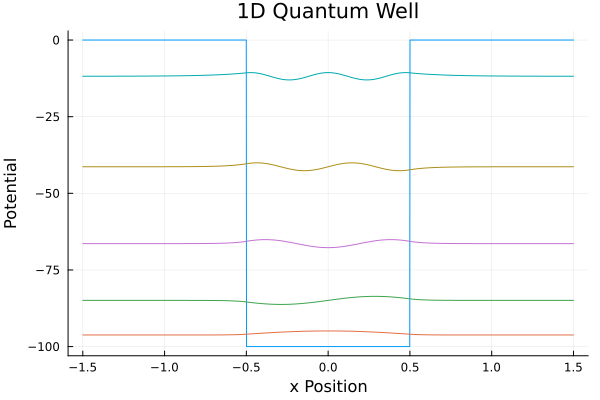

In [9]:
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [10]:
updatedEigenValues

5-element Vector{Float64}:
 -96.2117299343215
 -84.92394326633087
 -66.40909117952923
 -41.33362223199511
 -11.807407226161331

From this graph we an immediately tell that the 5 eigenstates are contained within the well and they each take the form of a sinusoidal wave with exponential decay beyond the boundary condition. Since I used a value of 2000 for the number of grid points the waves appear smooth. I want to also investigate that the wavefuntions take the correct energy eigenvalues. To check this I will be solving the Schrodinger equation numerically to find the eigenvalues for these wavefuntions. Using:

$$
E_n = \frac{n^2 \pi^2 \hbar^2}{2mw^2}
$$

Substituting the values that I used and using the ground state $(n = 1)$ we obtain:

$$
E_1 = \frac{1^2 \pi^2 1^2}{2(1)^2} = 4.935
$$

If we then add that onto the original well potential, we get that:

$$
U_1 = -100 + 4.935 = -95.065
$$

Which is very similar to the calculated eigenvalue. My next task is to see what happens when the width and depth of the well change. Firstly considering the width of the well. The new width of the well will be described by:

$$ w = 1.5 , U = -100$$

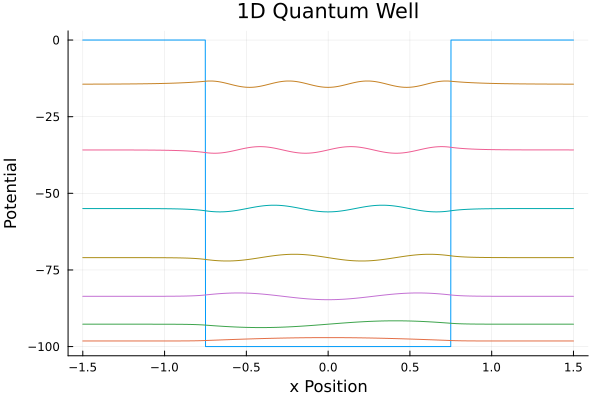

In [11]:
WellPotential = zeros(numOfGridPoints);
wellWidth = 1.5; # Updated well width
numberOfWavefuntions = 7;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise standard quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [12]:
updatedEigenValues

7-element Vector{Float64}:
 -98.1693936996228
 -92.68958908741419
 -83.59956004942325
 -70.97603734532754
 -54.96122465551173
 -35.8425103177779
 -14.388900865160906

We can see now that the wave functions have all been shifted down. This is because as we saw from the eigenvalue equation there is an inverse square relationship between the energy of the wavefuntion and the width of well that is. 

$$
E_n \propto \frac{1}{w^2}
$$

Therefore as the width of the well increases the energy eigenvalues decreases by the square amount. Next considering a change to the depth of the well, I will now be considering a well following these parameters:

$$ w = 1 , U = -30$$

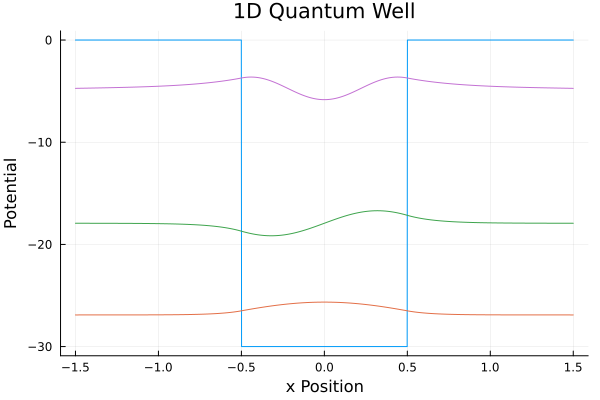

In [13]:
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
U_x = -30; # New potential
numberOfWavefuntions = 3;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise standard quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [14]:
updatedEigenValues

3-element Vector{Float64}:
 -26.90086114241626
 -17.92765327494322
  -4.726370160479064

We can now see that adjusting the wells potential means that fewer of the wavefuntions fit inside the well. However the eigenvalues do not change since the equation for this does not include the wells potential. 

### Finite Quantum Well With A Notch

For the next task I will implement a small notch within the centre of the well of height $U_n = 0.1 \times U$ and the width of the notch will be $ w_n = 1/2 \times w$. When adding a notch to the program I found the easiest way to do it was to create a new function that was called after the main potential well function was called. The function will add the notch potential to the base well potential between the specified width region. Below is a program that will add a notch to the previous quantum well.

In [15]:
notchWidth = 0.5; # Notch well
notchPotential = -27; # Notch potential 

These will be the properties of the notch.

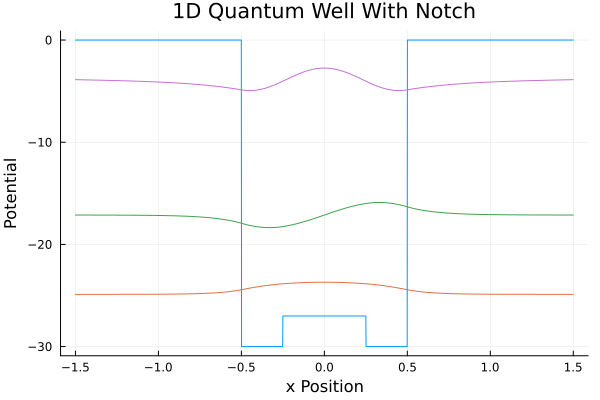

In [16]:
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
U_x = -30; # New potential
numberOfWavefuntions = 3;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise standard quantum well
addNotch(WellPotential,notchPotential,notchWidth); # Add notch
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Well With Notch", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [17]:
updatedEigenValues

3-element Vector{Float64}:
 -24.886729832783978
 -17.12448129882894
  -3.874669477973086

Adding the notch to the well had modified each of the wavefunctions. Firstly, the eigenvalues have all shifted up by a small amount and notably the third eigenstate has flipped since the particle is more likely to be found within the notch region[2]. I will now increase the height of the notch to $U_n = -24$.

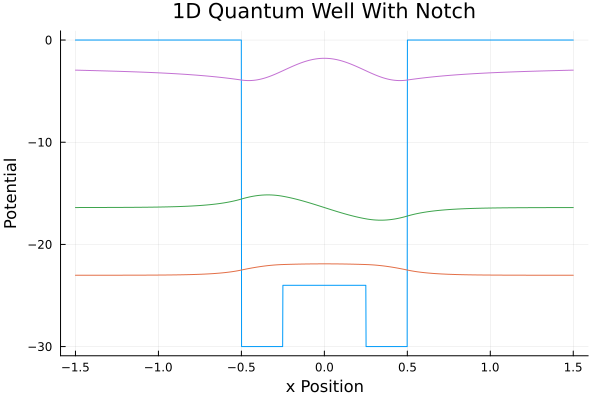

In [18]:
notchPotential = -24; # Notch potetial 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
U_x = -30; # New potential
numberOfWavefuntions = 3;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise standard quantum well
addNotch(WellPotential,notchPotential,notchWidth); # Add notch
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Well With Notch", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [19]:
updatedEigenValues

3-element Vector{Float64}:
 -23.016319654675065
 -16.39056801936271
  -2.941791315542037

Increasing the height of the notch meant that in addition to the third eigenstate being flipped the second one has also flipped. The associated eigenvalues of the wavefunctions have also increased. 

### Double Well System 

To expand the program to solve a double well system I will need to create a new function that will initialise two wells instead of just one. For this I will create a new function that will set all values within specific ranges to be equal to the wells potential. For example in my example I will be considering that the seperation distance $d$ of my wells will be equal to 0.1 and where $w$ is a shared well width. In my case I will be reducing the domain size to be 2 and the well width will be equal to 0.5.

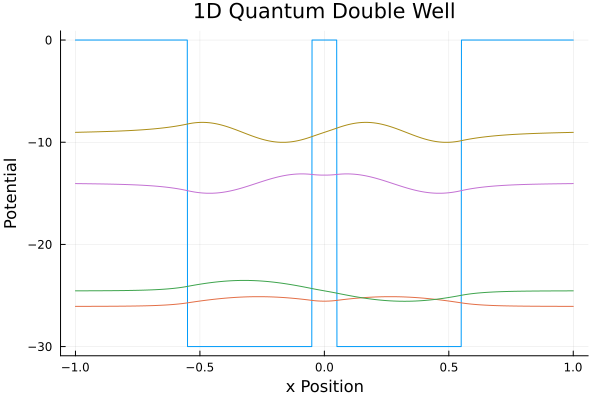

In [20]:
domainWidth = 2; # Width of the domain 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 0.5;
seperationDistance = 0.1 # Seperation of two wells
U_x = -30; # New potential
numberOfWavefuntions = 4;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseDoubleQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x, seperationDistance); # Initialise double quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Double Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [21]:
updatedEigenValues

4-element Vector{Float64}:
 -26.063336178532417
 -24.543487823507053
 -14.045679351804813
  -9.032066850260104

We can see immediately by taking into consideration the 4 lowest stable eigenstates that each of the wavefunctions experience tunneling between the two wells since there is a finite potential boundary between the two wells. We also see clearly that there is coupling between the pairs of eigenstates. This is because when there is a finite barrier tunneling produces a weak coupling between the two states causing the wavefunctions to overlap incident to the barrier. However if we modify the seperation distance the coupling effect on the eigenstates is more noticeable. For instance if I set the seperation distance to be equal to 0.5.

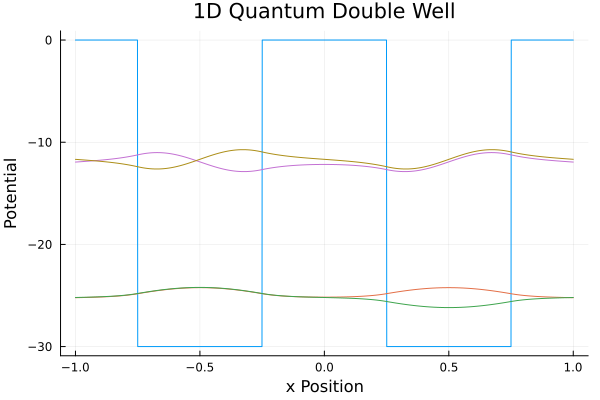

In [22]:
domainWidth = 2; # Width of the domain 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 0.5;
seperationDistance = 0.5; # Seperation of two wells
U_x = -30; # New potential
numberOfWavefuntions = 4;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseDoubleQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x, seperationDistance); # Initialise double quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Double Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [23]:
updatedEigenValues

4-element Vector{Float64}:
 -25.21592373426373
 -25.194461179943964
 -11.942603573389302
 -11.67221262684377

In this graph there is a much larger overlap between the pairs of eigenstates showing the coupling of the states is more prominent with this seperation of the wells. The electrons also appear to experience less tunneling between the two wells and appear more often in the wells.

### Differently Shaped Quantum Wells

For the first extension task I want to first consider a parabolic shape for the well. One which the well potential is modelled as the following:

$$
U_i = U_x (1 - (\frac{2x_i}{w})^2)
$$

I will be considering conditions that are the same as the first finite well task.

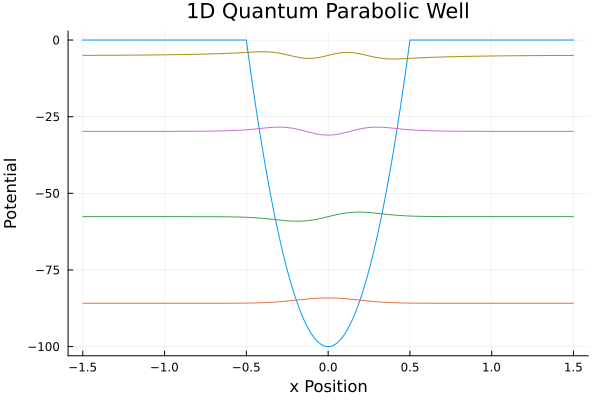

In [24]:
domainWidth = 3; # Width of the domain 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
U_x = -100; # New potential
numberOfWavefuntions = 4;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseQuadraticQuantumWell(WellPotential,U_x,wellWidth,numOfGridPoints,x); # Initialise quadratic quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Parabolic Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [25]:
updatedEigenValues

4-element Vector{Float64}:
 -85.85361373968406
 -57.607205399693385
 -29.792143931982835
  -4.999966550437591

We can see that from this the parabolic quantum well produces eigenvalues that are larger than in the initial question. This makes sense since overall the potential is lower than in the square well which means each of the wavefunctions are shifted up. Finally I want to model a double gaussian quantum well therefore I will need to create a new function that takes into account the spread or standard deviation of the gaussian well $\sigma$ and the seperation of the two wells $d$. I will set the potential of the wells to be modelled as such.

$$
U_i = U_x e^{-\frac{1}{2}(\frac{x - \frac{d}{2}}{2\sigma^2})}, U_i = U_x e^{-\frac{1}{2}(\frac{x + \frac{d}{2}}{2\sigma^2})}
$$

Firstly I will model a single gaussian quantum well with the following characteristics. $w = 1, \sigma = 0.6, d = 0, U_x = -100$ Since the two wells overlap the potetial will be set to -50.

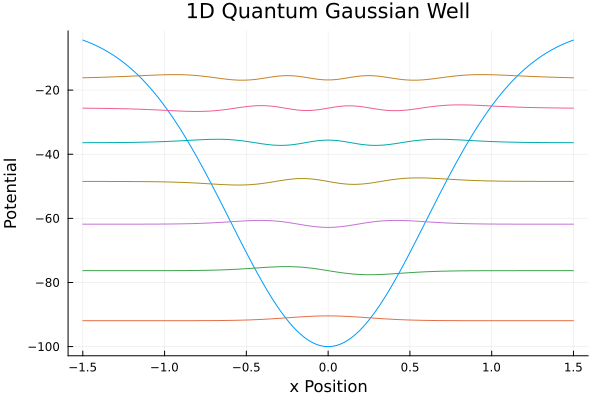

In [26]:
domainWidth = 3; # Width of the domain 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
sigma = 0.6;
seperationDistance = 0; # Seperation of two wells
U_x = -50; # New potential
numberOfWavefuntions = 7;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseDoubleGaussianWell(WellPotential,U_x,numOfGridPoints,x, sigma, seperationDistance); # Initialise gaussian quantum well
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Gaussian Well", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [27]:
updatedEigenValues

7-element Vector{Float64}:
 -91.92402158654146
 -76.31495185811207
 -61.817554810666245
 -48.489442176319
 -36.40132813591255
 -25.62931562702444
 -16.16480069365315

We can see that the gaussian quantum well is a smooth curve which means that there less abrupt changes with the wavefunctions. Also the energy eigenvalues do not scale as $n$ grows if anything it diminishes as $n$ grows larger. The final problem I will consider is a quantum double gaussian well where there is a positive potential between the two wells. For this I will use the previously made initialiseDoubleGaussianWell() and addNotch(). Where the potential is described by the following parameters. $w = 1, \sigma = 0.25, d = 1.5, U_x = -60, U_n = 20, w_n = 0.5$.

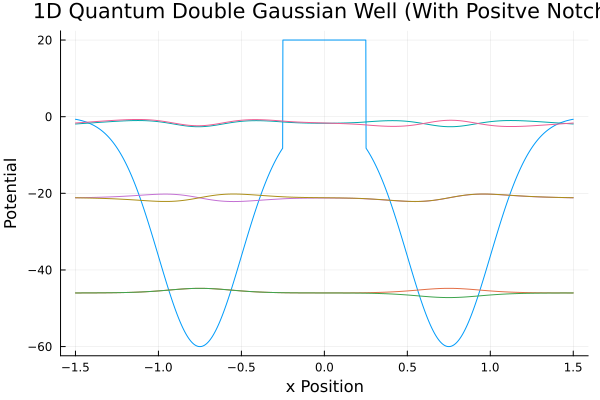

In [28]:
domainWidth = 3; # Width of the domain 
WellPotential = zeros(numOfGridPoints); # Resets potential
wellWidth = 1;
sigma = 0.25;
notchPotential=20;
notchWidth=0.5;
seperationDistance = 1.5; # Seperation of two wells
U_x = -60; # New potential
numberOfWavefuntions = 6;
x = range(-domainWidth/2, domainWidth/2, numOfGridPoints); # Initialise rang of the domain
initialiseDoubleGaussianWell(WellPotential,U_x,numOfGridPoints,x, sigma, seperationDistance); # Initialise double gaussian quantum well
addNotch(WellPotential,notchPotential,notchWidth); # Add notch
hamiltonian = createHamiltonain(t,numOfGridPoints); # Create hamiltonian
# Calculate the eigenvalues and eigenvectors
energyEigen = eigen(hamiltonian);
energyEigenVectors = energyEigen.vectors;
energyEigenValues = energyEigen.values;
# Normalise the wave function then displace each of the wave function by the corrsponding eigenvalue
energyEigenVectors = normaliseWavefunction(numOfGridPoints,energyEigenVectors, dx);
energyEigenVectors = addEigenValue(numOfGridPoints,energyEigenVectors,energyEigenValues);
# Select the amount of eigenfuntions displayed 
updatedEigenVector = [energyEigenVectors[:, i] for i in 1:1:numberOfWavefuntions];
updatedEigenValues = [energyEigenValues[i] for i in 1:1:numberOfWavefuntions];
# Plot the well with the wavefunctions
gr()
plot(x,WellPotential, title="1D Quantum Double Gaussian Well (With Positve Notch)", xlabel = "x Position", ylabel = "Potential") # plot the well
plot!(x,updatedEigenVector, legend = false) # Plot wavefunctions

In [29]:
updatedEigenValues

6-element Vector{Float64}:
 -45.999520016708225
 -45.9989005285168
 -21.174746476597754
 -21.14991353828223
  -1.9074982859560947
  -1.645225106226576

From this graph we can tell that adding a large positive barrier in between the two wells decreases the amount of tunneling between the two wells and significantly increases the likelihood of observing the electron in one of the two wells. Also we can see just as last time with the double well there is coupling between the pairs of wavefunctions.

### Conclusion

To conclude this notebook I have used the central difference method along side julia's inbuilt linear algebra package to outlined how electrons behave in various configurations of quantum wells. I have shown how the eigenstates and wavefunctions associated with the electron change depending what the potential of the quantum well is. Improvements I would make to this code would be to add a way to create an arbitrary number of wells to see what happens to the coupiling between the wavefunctions at higher number of wells than 2. I would also add the functionality to go between 1D and 2D and possible 3D. 

### References

- $\text{[1] Greenaway, M.T.,  \it{Numerically Solving the Schrodinger equation}, \text{Lecture notes, Loughborough Univeristy}} $ https://learn.lboro.ac.uk/pluginfile.php/3028947/mod_resource/content/0/slides_schrodinger_discrete.pdf
- $\text{[2] Dufus, S.N.A. Everitt, M.J.,  \it{Particles and Potentials}, \text{Lecture notes, Loughborough Univeristy}}$ https://learn.lboro.ac.uk/pluginfile.php/2740617/mod_resource/content/8/6ParticlesandPotentials.pdf